In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [2]:
#creating the dataset
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])     #(m,)

w=[0,1]
b=1

In [3]:
# adding feature scalling
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
m,n =x_train.shape
maxX = np.max(x_train)
for i in range (m):
    for j in range(n):
        x_train[i,j] = x_train[i,j]/maxX
print(x_train)


[[0.16666667 0.5       ]
 [0.33333333 0.33333333]
 [0.5        0.16666667]
 [1.         0.16666667]
 [0.66666667 0.66666667]
 [0.33333333 0.83333333]]


In [4]:
#creating the formula
def f_sigmod(x, w, b):
    f=np.dot(x, w) + b 
    z = 1/(1+np.exp(-f))
    return z
print(f_sigmod(w, b, x_train[3]))

[0.73105858 0.76254197]


In [5]:
#creating the cost function
def c(x, y, w, b, l):
    m,n = x.shape
    error = 0
    add = 0
    for i in range(m):
        error = -y[i] * np.log(f_sigmod(x[i], w, b)) - (1 - y[i]) * np.log(1 - f_sigmod(x[i], w, b))
        add = add + error
    J = (1 / m) * add

    tmpw = 0
    reg = 0
    for j in range(n): # adding regularization
        tmpw += w[j]**2
    reg = (l / (2 * m)) * tmpw
    
    J = J + reg
    return J
print(c(x_train, y_train, w, b, 1))

0.9664825964931864


In [6]:
#creating gradient for 1 iter
def g(w, b, x, y, l):
    m,num = x.shape
    w_add = 0
    b_add = 0
    w_error = np.zeros((num,))
    for i in range(m):
        err = (f_sigmod(x[i], w, b) - y[i])
        for n in range(num):
            w_error[n] = w_error[n] + (err*x[i,n])
            #w_add += w_error[i]
        b_error = (f_sigmod(x[i], w, b) - y[i])
        b_add += b_error

    w_one_m = w_error / m
    b_one_m = b_add / m
    #w = w - (a*w_one_m)
    #b = b - (a*b_one_m)

    for j in range(num): # adding regularization
        w_one_m[j] = w_one_m[j] + (l/m) * w[j]

    return w_one_m, b_one_m
w_t, b_t = g(w, b, x_train, y_train, 1)
print(w_t)
print(b_t)


[0.06533543 0.25655293]
0.3062231883889905


In [7]:
#calculating gradient descent
def gd(w_in, b_in, x, y, a, l, c, g, iters):
    #m = x.shape[0]
    w_final = copy.deepcopy(w_in)
    b_final = b_in
    p = []
    w_g = 0
    b_g = 0
    for i in range(iters):
        w_g, b_g = g(w_final, b_final, x, y, l)
        w_final = w_final - (a*w_g)
        b_final = b_final - (a*b_g)
        if i % 10 == 0:
            p.append(c(x, y, w_final, b_final, l))
    return w_final, b_final, p
print(gd(w, b, x_train, y_train, 0.1, 1, c, g, 1000))

(array([0.46214002, 0.32269623]), np.float64(-0.3744575518290793), [np.float64(0.9503117617186285), np.float64(0.8297499938191526), np.float64(0.7630891594842398), np.float64(0.7267363439402102), np.float64(0.7062783343303343), np.float64(0.6940625376668774), np.float64(0.686263298706041), np.float64(0.6809770856796182), np.float64(0.6772242655537072), np.float64(0.6744701757710903), np.float64(0.672401830527343), np.float64(0.670823074170688), np.float64(0.6696036914770594), np.float64(0.6686533537959297), np.float64(0.6679073686572694), np.float64(0.6673183283862796), np.float64(0.6668508996874886), np.float64(0.6664784034942757), np.float64(0.6661804823261521), np.float64(0.6659414642624267), np.float64(0.665749191666232), np.float64(0.6655941693541398), np.float64(0.6654689371701428), np.float64(0.6653676028090935), np.float64(0.6652854905845582), np.float64(0.6652188750238183), np.float64(0.6651647771457636), np.float64(0.6651208074890049), np.float64(0.6650850443139664), np.float

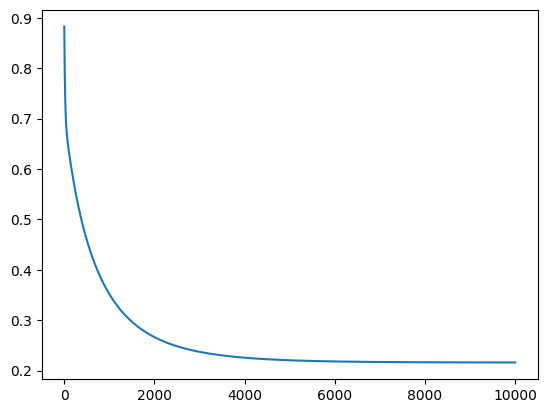

In [8]:
#graphing out graident descent to check if it is working properly.
w_graph, b_graph, p = gd(w, b, x_train, y_train, 0.01, 0.01, c, g, 100000)
p_iters = np.arange(len(p))
plt.plot(p_iters, p)

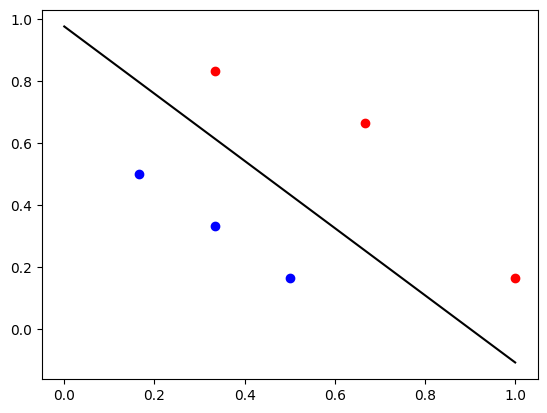

In [9]:
# Plot the data points
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], label="Class 0", color="blue")
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], label="Class 1", color="red")

#plot the decision boundry
x1_values = np.linspace(0, 1, 5)  # Range of x1 values
x2_values = (-w_graph[0] * x1_values - b_graph) / w_graph[1]  # Corresponding x2 values
plt.plot(x1_values, x2_values, label="Decision Boundary", color="black")

plt.show()